# Data collected from https://rebrickable.com/downloads/ and is current as of Nov. 21, 2024, 7:08 a.m.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import re

In [3]:
inventories = pd.read_csv('../data/inventories.csv')
inventory_minifigs = pd.read_csv('../data/inventory_minifigs.csv')
inventory_parts = pd.read_csv('../data/inventory_parts.csv')
inventory_sets = pd.read_csv('../data/inventory_sets.csv')
part_categories = pd.read_csv('../data/part_categories.csv')
parts = pd.read_csv('../data/parts.csv')
sets = pd.read_csv('../data/sets.csv')
themes = pd.read_csv('../data/themes.csv')

In [4]:
df1a = pd.merge(sets, themes, 
                               left_on = 'theme_id', right_on = 'id', 
                               how = 'left')
df1a.rename({'name_x': 'set_title',  
           'name_y': 'theme'},  
          axis = "columns", inplace = True) 
df1a.drop('id', axis=1, inplace=True)

In [5]:
df2a = pd.merge(df1a, inventory_sets,
                               left_on = 'set_num', right_on = 'set_num',
                               how = 'left')
df2a.rename({'quantity': 'inv_quant'},  
          axis = "columns", inplace = True) 

In [6]:
df3a = pd.merge(inventories, inventory_minifigs,
                               left_on = 'id', right_on = 'inventory_id',
                               how = 'left')
df3a = df3a.groupby('set_num').quantity.count()
df3a = pd.DataFrame(df3a).reset_index()
df3a.rename({'quantity': 'mini_fig_count'},  
          axis = "columns", inplace = True) 

In [7]:
story_1_df = pd.merge(df2a, df3a,
                       left_on = 'set_num', right_on = 'set_num',
                       how = 'left')
story_1_df = story_1_df.loc[story_1_df['num_parts'] > 0]

In [8]:
df1b = pd.merge(parts, part_categories,
                        left_on = 'part_cat_id', right_on = 'id',
                        how = 'left')
df1b.rename({'name_x': 'part_title',  
           'name_y': 'part_type'},  
          axis = "columns", inplace = True) 
df1b.drop('id', axis=1, inplace=True)

In [9]:
df2b = pd.merge(df1b, inventory_parts,
                        left_on = 'part_num', right_on = 'part_num',
                        how = 'left')

In [10]:
df3b = pd.merge(df2b, inventories,
                        left_on = 'inventory_id', right_on = 'id',
                        how = 'left')

In [11]:
story_2_df = pd.merge(df2a, df3b,
                        left_on = 'set_num', right_on = 'set_num',
                        how = 'left')
story_2_df.rename({'img_url_x': 'set_img_url',  
           'img_url_y': 'part_img_url',
            'quantity': 'part_quant'},  
          axis = "columns", inplace = True) 
story_2_df.drop('id', axis=1, inplace=True)

story_2_df.to_csv("lego_power_bi.csv", index=False) 

In [13]:
story_2_df.head()

,set_num,set_title,year,theme_id,num_parts,set_img_url,theme,parent_id,inventory_id_x,inv_quant,...,part_title,part_cat_id,part_material,part_type,inventory_id_y,color_id,part_quant,is_spare,part_img_url,version
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...,Activity Books with LEGO Parts,497.0,NaN,NaN,...,Weapon Sword / Katana / Shamshir with Capped P...,27.0,Plastic,Minifig Accessories,206820.0,179.0,1.0,False,https://cdn.rebrickable.com/media/parts/elemen...,1.0
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Samsonite,365.0,24732.0,1.0,...,Tyre Smooth Old Style - Small,29.0,Rubber,Wheels and Tyres,24696.0,7.0,4.0,False,https://cdn.rebrickable.com/media/parts/ldraw/...,1.0
2,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Samsonite,365.0,24732.0,1.0,...,Plate 2 x 4,14.0,Plastic,Plates,24696.0,15.0,4.0,False,https://cdn.rebrickable.com/media/parts/elemen...,1.0
3,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Samsonite,365.0,24732.0,1.0,...,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",20.0,Plastic,Bricks Round and Cones,24696.0,15.0,1.0,False,https://cdn.rebrickable.com/media/parts/ldraw/...,1.0
4,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Samsonite,365.0,24732.0,1.0,...,"Turntable 4 x 4 - Old Type Complete, Perfectly...",18.0,Plastic,"Hinges, Arms and Turntables",24696.0,15.0,4.0,False,https://cdn.rebrickable.com/media/parts/ldraw/...,1.0


## 1. Look into theme diversity to identify set counts per theme in order to understand what Lego is more likely (and less likely) to produce from Lego Ideas. Goal to identify dominance to assert concentration.

In [15]:
exclude_non_lego = ['Stationery and Office Supplies', 'Activity Books with LEGO Parts', 'Mini', 'Value Packs', 'Activity Books', 'Supplemental', 'System', 'Playhouse', 'Jumbo Bricks', 'Non-fiction Books', 'Storage', 'Universal Building Set', 'Story Books', 'Video Games and Accessories', 'Bulk Bricks', '4.5V', 'Gear', 'Stationary and Office Supplies', 'Key Chain', 'LEGO Brand Store', 'Houseware', 'Other', 'NXT', 'Promotional', 'Building Set with People', 'Educational and Dacta', 'Plush Toys', 'Advent', 'Database Sets', 'HO 1:87 Vehicles', 'Ideas Books', 'Service Packs', 'Magnets', 'Series 1 Minifigures', 'Series 2 Minifigures', 'Series 3 Minifigures', 'Series 4 Minifigures', 'Series 5 Minifigures', 'Series 6 Minifigures', 'Series 7 Minifigures', 'Series 8 Minifigures', 'Series 9 Minifigures', 'Series 10 Minifigures', 'Series 11 Minifigures', 'Series 12 Minifigures', 'Series 13 Minifigures', 'Series 14 Minifigures', 'Series 15 Minifigures', 'Series 16 Minifigures', 'Series 17 Minifigures', 'Series 18 Minifigures', 'Series 19 Minifigures', 'Series 20 Minifigures', 'Series 21 Minifigures', 'Series 22 Minifigures', 'Series 23 Minifigures', 'Series 24 Minifigures', 'Series 25 Minifigures', 'Series 26 Minifigures']
 
story_1_df = story_1_df[~story_1_df['theme'].isin(exclude_non_lego)]
story_1_df['decade'] = (story_1_df['year'] // 10) * 10

In [16]:
sets_per_theme_desc = story_1_df.groupby('theme').count().sort_values('set_num', ascending = False).reset_index().head(20)

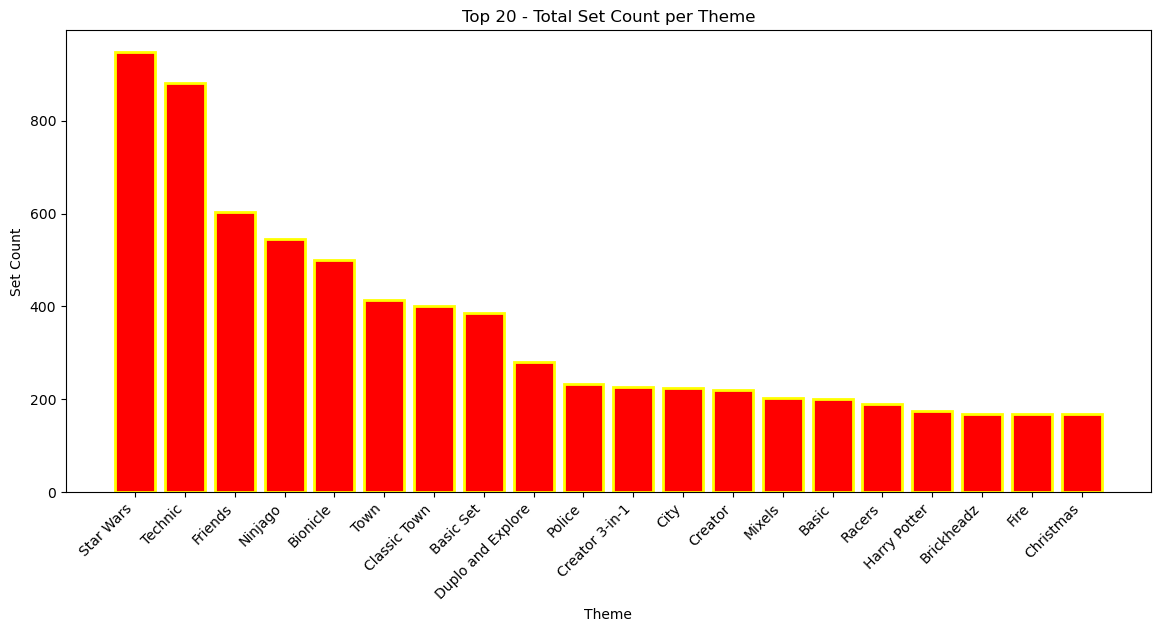

In [17]:
plt.figure(figsize=(14, 6))
plt.bar(sets_per_theme_desc.theme, sets_per_theme_desc.set_num, color= ("red"), edgecolor=('yellow'), linewidth=2) 
plt.ylabel("Set Count")
plt.xlabel("Theme")
plt.title("Top 20 - Total Set Count per Theme")
plt.xticks(rotation=45, ha = 'right')
plt.savefig('total_set_count_per_theme_top.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [18]:
sets_per_theme_asc = story_1_df.groupby('theme').count().sort_values('set_num').reset_index().head(20)

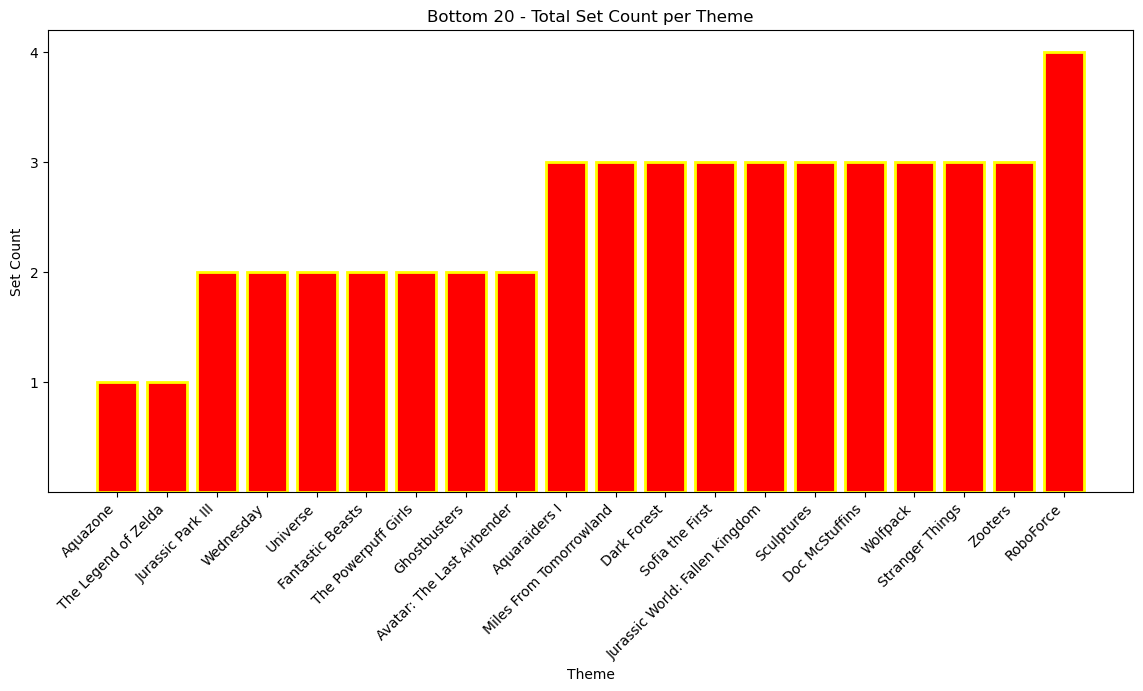

In [19]:
plt.figure(figsize=(14, 6))
plt.bar(sets_per_theme_asc.theme, sets_per_theme_asc.set_num, color= ("red"), edgecolor=('yellow'), linewidth=2) 
plt.ylabel("Set Count")
plt.xlabel("Theme")
plt.title("Bottom 20 - Total Set Count per Theme")
plt.xticks(rotation=45, ha = 'right')
plt.yticks(np.arange(min(sets_per_theme_asc['set_num']), max(sets_per_theme_asc['set_num'])+1, 1))
plt.savefig('total_set_count_per_theme_bottom.png', bbox_inches = 'tight', transparent=True)
plt.show()

## 2. Look into theme popularity over time via set count, identifying theme progression over time. Due to volume of themes will likely look into top 3-5 and bottom 3-5 using clustered bar charts (maybe up to 10 top/bottom using line charts). Most likely on a yearly (or half-decade/decade bins) basis since there is data all the way back to the 1960s.

In [21]:
decade_df = story_1_df.groupby(['theme', 'decade']).count().sort_values('theme', ascending=False).reset_index()

In [22]:
theme_year_df = story_1_df.groupby(['theme', 'year']).count().sort_values('theme', ascending=False).reset_index()

In [23]:
top_10_theme = sets_per_theme_desc['theme'].head(10)

theme_year_df = theme_year_df[theme_year_df['theme'].isin(top_10_theme)]

In [24]:
decade_df = decade_df[decade_df['theme'].isin(top_10_theme)]

In [25]:
decade_df = decade_df.loc[decade_df['decade'] != 2020]

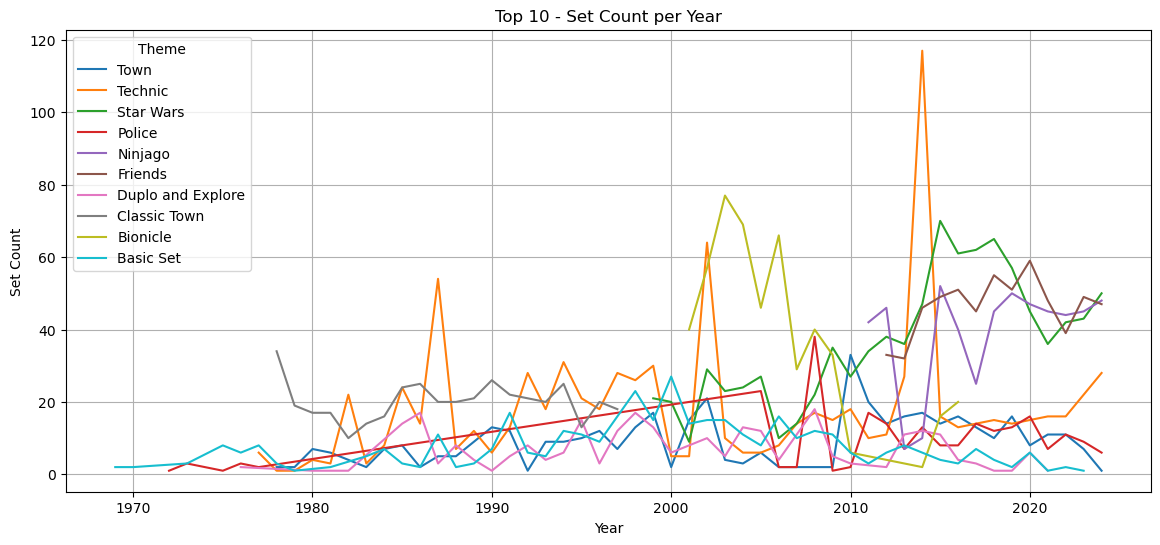

In [26]:
plt.figure(figsize=(14, 6))
sns.lineplot(x = theme_year_df.year, y = theme_year_df.set_num, hue = theme_year_df.theme)
plt.ylabel("Set Count")
plt.xlabel("Year")
plt.title("Top 10 - Set Count per Year")
plt.legend(title="Theme")
plt.grid()
plt.savefig('set_count_by_year.png', bbox_inches = 'tight', transparent=True)
plt.show()

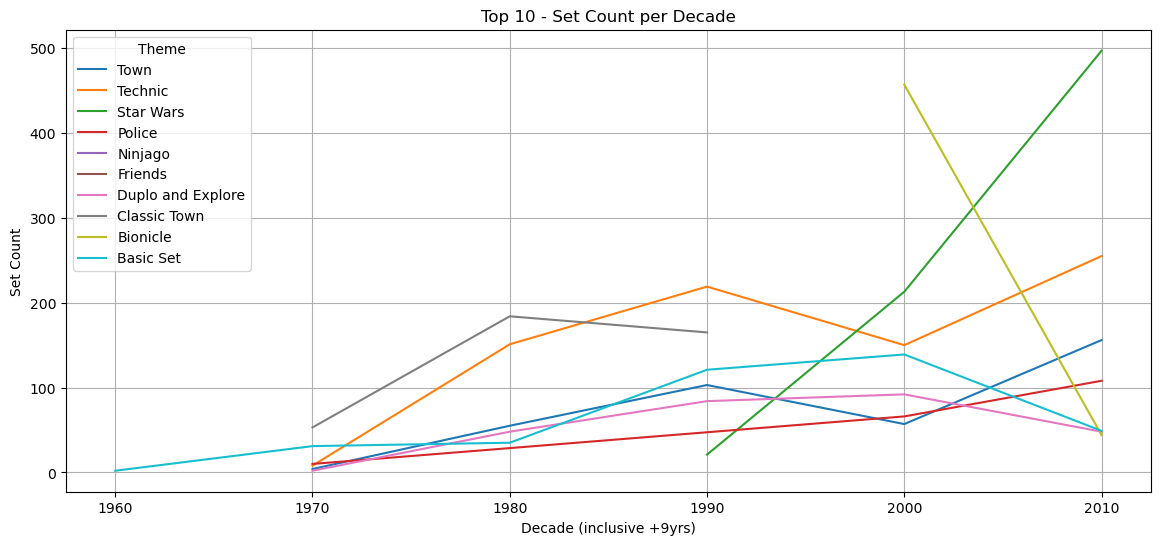

In [27]:
plt.figure(figsize=(14, 6))
sns.lineplot(x = decade_df.decade, y = decade_df.set_num, hue = decade_df.theme)
plt.ylabel("Set Count")
plt.xlabel("Decade (inclusive +9yrs)")
plt.title("Top 10 - Set Count per Decade")
plt.legend(title="Theme")
plt.grid()
plt.savefig('set_count_by_decade.png', bbox_inches = 'tight', transparent=True)
plt.show()

### Bionicle launched in 2001, and was sunset in 2010. The launch of Bionicle quickly followed negative profits in 1998 and 2000 in an attempt to avoid financial crisis or bankruptcy. Unlike previous Lego themes, Bionicle was accompanied by an original story that was told across a multimedia spectrum, including books, comics, games, and animated films. Which helped drive the adoration from old and soon to be new LEGO lovers.

## 3a. Identify themes that have endured the tests of time, answering which themes will allways be relevant. Try to identify any factors that may have played into the longevity of the theme popularity.

In [30]:
longevity_df = story_1_df.groupby(['theme', 'year']).count().sort_values(['theme', 'year']).reset_index()

In [31]:
years_active_top_df = longevity_df.groupby('theme').count().sort_values('year', ascending = False).reset_index()
years_active_top_df = years_active_top_df.head(20)

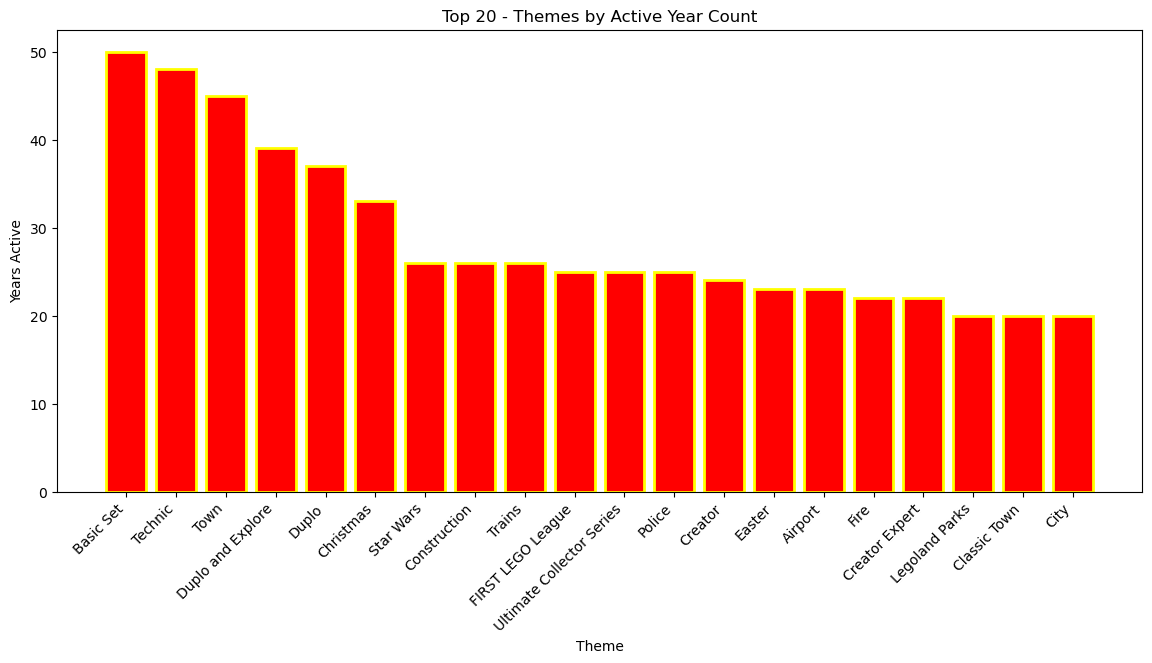

In [32]:
plt.figure(figsize=(14, 6))
plt.bar(years_active_top_df.theme, years_active_top_df.year, color= ("red"), edgecolor=('yellow'), linewidth=2) 
plt.ylabel("Years Active")
plt.xlabel("Theme")
plt.title("Top 20 - Themes by Active Year Count")
plt.xticks(rotation=45, ha = 'right')
plt.savefig('top_20_active_year.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [33]:
years_active_bottom_df = longevity_df.groupby('theme').count().sort_values('year').reset_index()
years_active_bottom_df = years_active_bottom_df.head(20)

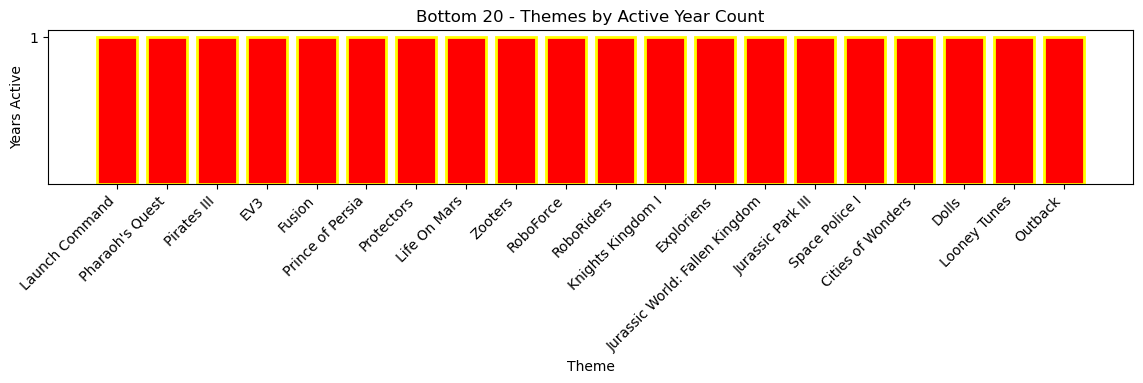

In [34]:
plt.figure(figsize=(14, 2))
plt.bar(years_active_bottom_df.theme, years_active_bottom_df.year, color= ("red"), edgecolor=('yellow'), linewidth=2) 
plt.ylabel("Years Active")
plt.xlabel("Theme")
plt.title("Bottom 20 - Themes by Active Year Count")
plt.xticks(rotation=45, ha = 'right')
plt.yticks(np.arange(min(years_active_bottom_df['year']), max(years_active_bottom_df['year'])+1, 1))
plt.savefig('bottom_20_active_year.png', bbox_inches = 'tight', transparent=True)
plt.show()

## 3b. Which themes have the top/bottom available resale sets on ReBrickable? This to show which themes are valuable enough to re-sell, giving insight to which themes to concentrate on or avoid.

In [36]:
resale_top_df = story_1_df.groupby('theme').sum().sort_values('inv_quant', ascending = False).reset_index().head(20)

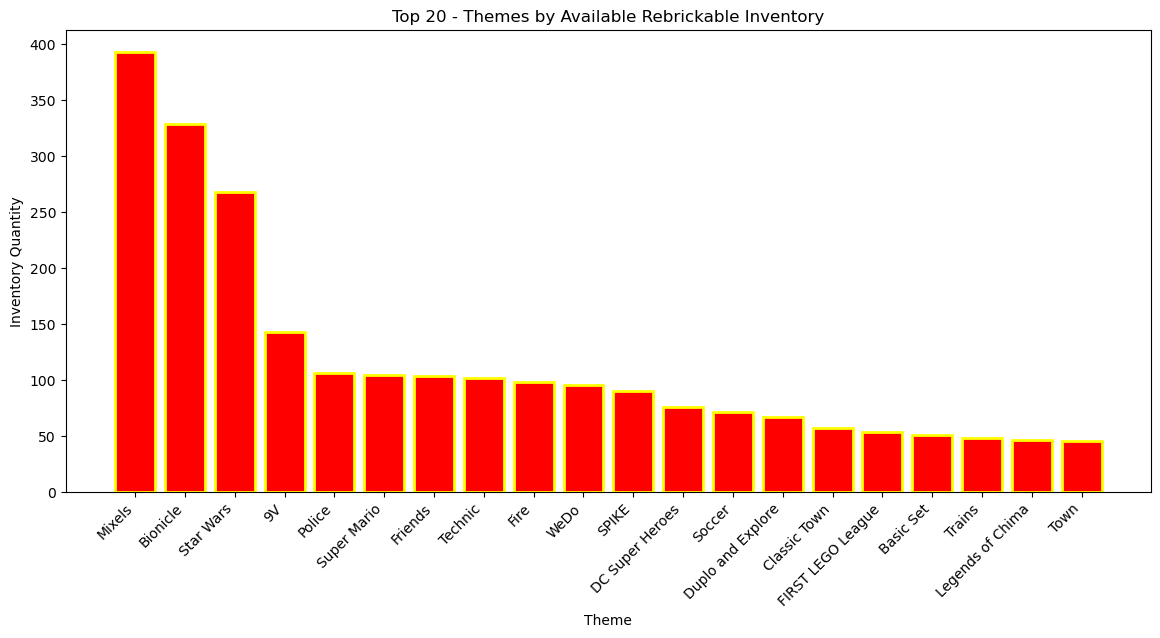

In [37]:
plt.figure(figsize=(14, 6))
plt.bar(resale_top_df.theme, resale_top_df.inv_quant, color= ("red"), edgecolor=('yellow'), linewidth=2) 
plt.ylabel("Inventory Quantity")
plt.xlabel("Theme")
plt.title("Top 20 - Themes by Available Rebrickable Inventory")
plt.xticks(rotation=45, ha = 'right')
plt.savefig('top_20_rebrickable_inventory.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [38]:
resale_bottom_df = story_1_df.groupby('theme').sum().sort_values('inv_quant').reset_index()
resale_bottom_df = resale_bottom_df.loc[resale_bottom_df['inv_quant'] >= 1.0].head(20)

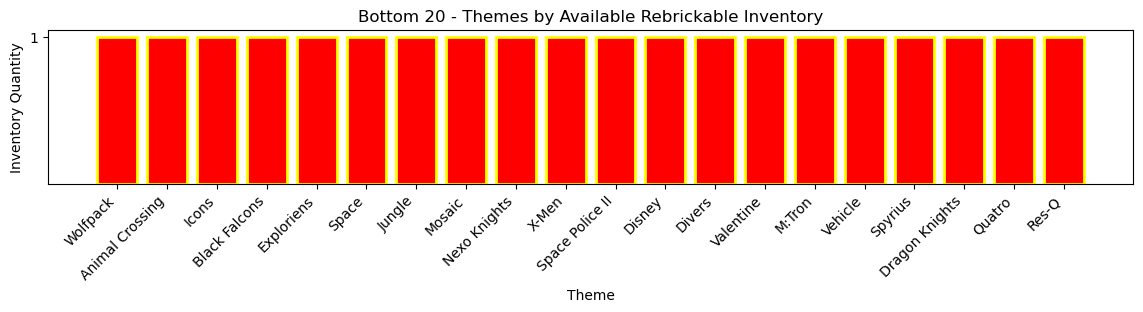

In [39]:
plt.figure(figsize=(14, 2))
plt.bar(resale_bottom_df.theme, resale_bottom_df.inv_quant, color= ("red"), edgecolor=('yellow'), linewidth=2) 
plt.ylabel("Inventory Quantity")
plt.xlabel("Theme")
plt.title("Bottom 20 - Themes by Available Rebrickable Inventory")
plt.xticks(rotation=45, ha = 'right')
plt.yticks(np.arange(min(resale_bottom_df['inv_quant']), max(resale_bottom_df['inv_quant'])+1, 1))
plt.savefig('bottom_20_rebrickable_inventory.png', bbox_inches = 'tight', transparent=True)
plt.show()

## 4. Look into lego sets as a whole, regardless of theme, over a time span. Were there any contibuting factors linked to years/decades where set count decreased vs increased (try to find supporting articles). Identify which years released the most and least, again, look for contributing factors. (I may place this before #2 based on how the story sounds once I've pulled the data)

In [41]:
years_all_df = story_1_df.groupby('year').count().sort_values('year').reset_index()

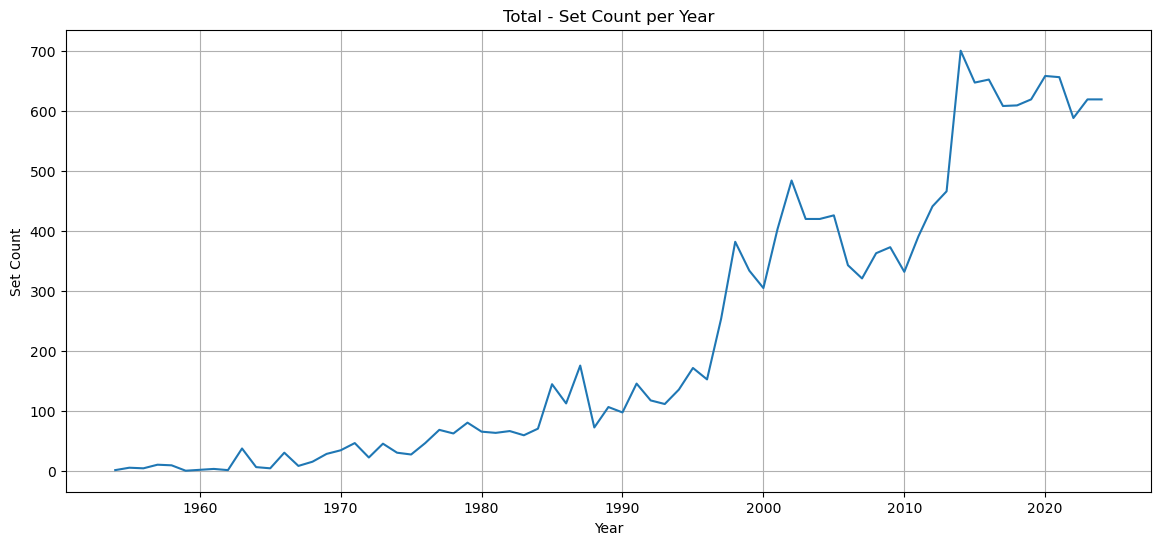

In [42]:
plt.figure(figsize=(14, 6))
sns.lineplot(x = years_all_df.year, y = years_all_df.set_num)
plt.ylabel("Set Count")
plt.xlabel("Year")
plt.title("Total - Set Count per Year")
plt.grid()
plt.savefig('set_all_by_year.png', bbox_inches = 'tight', transparent=True)
plt.show()

## 5. Another interesting deep dive would be sets produced based on volume of pieces. Divide sets into groups of sml, med, lrg based on set count (likely max piece count divided by 3 to assign my windows). This to help identify Lego idea sets that may be too big, or too small. But there's also a possiblity that large sets are the majority, making piece count a contributing factor to eligibility.

In [44]:
for ind, row in story_1_df.iterrows():
    if row.num_parts == row.num_parts < 51:
        story_1_df.loc[ind, 'size'] = '1 - 50'
    elif row.num_parts == row.num_parts > 249:
        story_1_df.loc[ind, 'size'] = '251 +'
    else: story_1_df.loc[ind, 'size'] = '51 - 250'

In [45]:
size_df = story_1_df.groupby('size').count().sort_values('size').reset_index()

In [46]:
new_order = [0, 2, 1] 

size_df = size_df.reindex(new_order).reset_index(drop=True)

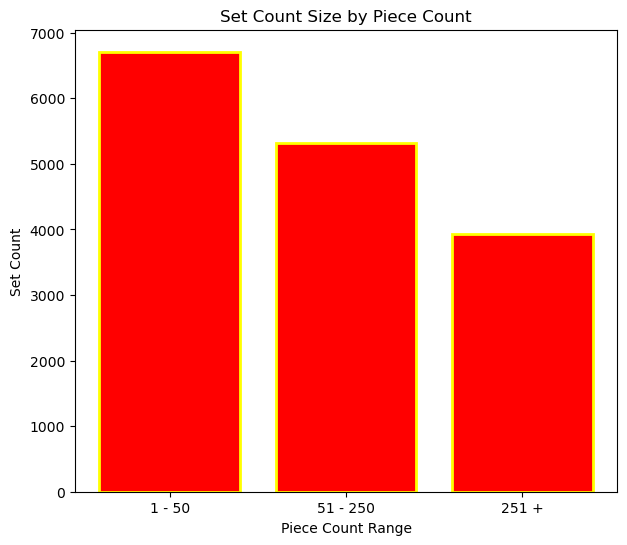

In [47]:
plt.figure(figsize=(7, 6))
plt.bar(size_df['size'], size_df.set_num, color= ("red"), edgecolor=('yellow'), linewidth=2) 
plt.ylabel("Set Count")
plt.xlabel("Piece Count Range")
plt.title("Set Count Size by Piece Count")
plt.savefig('count_by_size.png', bbox_inches = 'tight', transparent=True)
plt.show()

In [48]:
size_year_df = story_1_df.groupby(['size', 'year']).count().sort_values('size', ascending=False).reset_index()

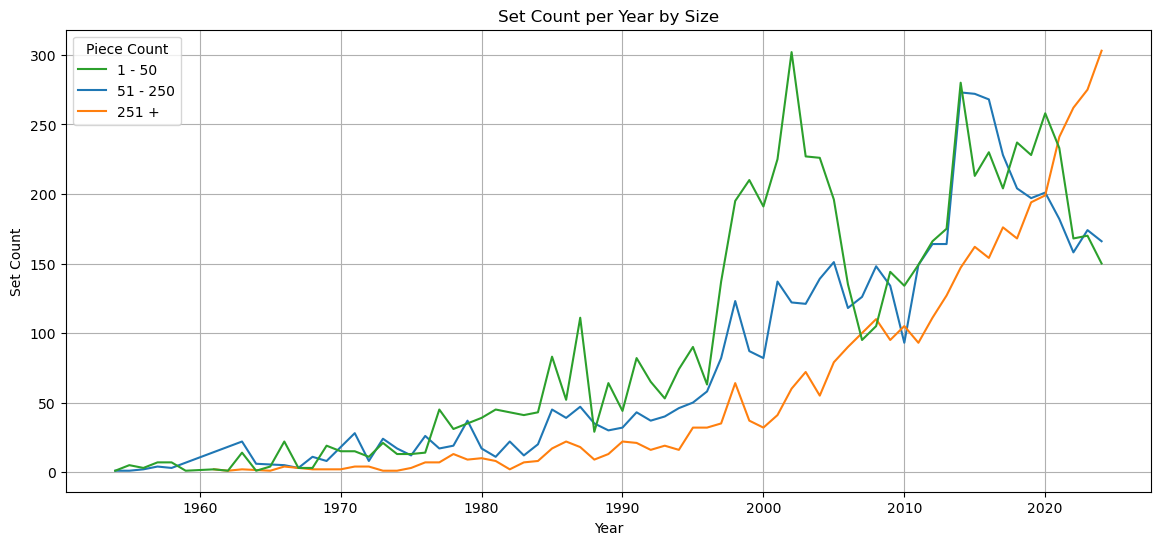

In [49]:
plt.figure(figsize=(14, 6))
sns.lineplot(x = size_year_df.year, y = size_year_df.set_num, hue = size_year_df['size'])
plt.ylabel("Set Count")
plt.xlabel("Year")
plt.title("Set Count per Year by Size")
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title="Piece Count")
plt.grid()
plt.savefig('set_count_per_year_by_size.png', bbox_inches = 'tight', transparent=True)
plt.show()

## Bonus if time permits - Scrape ratings info from https://brickinsights.com/, only bummer there is the data stopped being updated in 2022, and I'm unsure how far back it goes, so this will be a reduced data set. Should be easy to exluded sets that don't fall within the ratings window using .loc. Would likely only pull data for top/bottom 5-10 themes, mainly for a glimpse of reviewer sentiment (reviewers being a Lego blog or review site, from a specified list gathered by Brick Insights).

## Bonus (2) - look for any correlation, or at least compare the data for themes that are associated with movie franchises.